In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target

In [5]:
def min_euclidean_dist(point,centroids):
    dist = []
    for m in centroids:
        dist.append(np.sqrt(np.sum((point-m)**2)))
    return dist.index(min(dist)),

def total_distance(X,target,centroids):
    dist = []
    for i in range(len(X)):
        center = centroids[target[i]]
        dist.append(np.sqrt(np.sum((X[i]-center)**2)))
    return(np.sum(dist))

In [6]:
def initialize_cluster(k,n):
    return(np.random.choice(range(n), k, replace=False))

In [7]:
k = 3 #number of clusters

In [8]:
#calculate the centroids 
def centroid(X,k):
    n = X.shape[0] #number of points in dataset
    points = np.sort(initialize_cluster(k,n))
    centroids = []
    for i in points:
        centroids.append(X[i])
    return centroids

#updating centroids
def update_centroid(X,k,target):
    centroids = []
    for i in range(k):
        index_set = [index for index, value in enumerate(target) if value == i]
        subset_X = [list(X[index]) for index in index_set] 
        centroids.append(np.mean(np.array(subset_X),axis=0))
    return(centroids)

In [9]:
def k_means(X,k):
    centroids = centroid(X,k)
    flag = 0
    total_dist =[]
    while(flag==0):
        target=[]
        for i in range(len(X)):
            #calculate min distance 
            group = min_euclidean_dist(X[i],centroids)
            target.append(int(group[0]))
        total_dist.append(total_distance(X,target,centroids))
        centroids = update_centroid(X,k,target)
        if len(total_dist)>3:
            n = len(total_dist)-1
            if total_dist[n] == total_dist[n-1] and total_dist[n-1] == total_dist[n-2]:
                flag = 1
    return(target)

In [10]:
target = k_means(X,k)
print(f'Accuracy : {metrics.accuracy_score(target,y)}')

Accuracy : 0.8933333333333333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


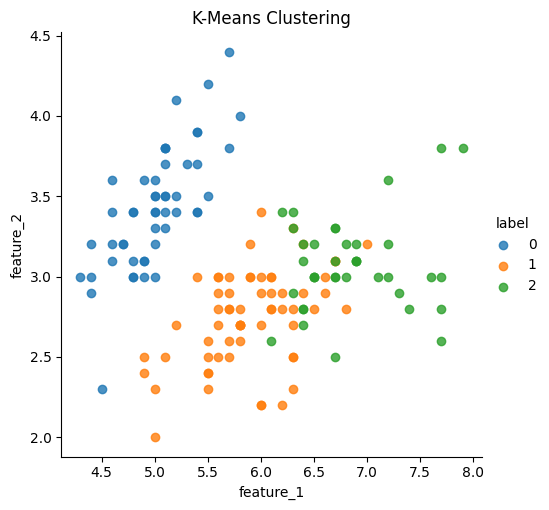

In [11]:
label = np.array(target).reshape(len(X),1)
data = pd.DataFrame(X[:,:2],columns=['feature_1','feature_2'])
data['label'] = label
sns.lmplot(data=data, x='feature_1', y='feature_2',hue='label',fit_reg=False, legend=True, legend_out=True)
plt.title("K-Means Clustering")
plt.show()